In [16]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,5)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams["axes.grid"] = True

In [2]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.6'

In [128]:
from scipy.signal import argrelextrema
import pandas as pd
df = fdr.DataReader('KS11', '2019-01-01', '2019-12-31')

In [129]:
smooth_prices = df['Close'].rolling(window=5, min_periods=1).mean().dropna()
local_max = argrelextrema(smooth_prices.values, np.greater)[0]
local_min = argrelextrema(smooth_prices.values, np.less)[0]

In [185]:
def search_point(i, left_window_range, right_window_range, mmtype, price_list):
    if(mmtype == 1):
        max_index = df.iloc[i - left_window_range:i+right_window_range]['Close'].idxmax()
        max_len = len(df.loc[:max_index,:])
        if(df.iloc[max_len - left_window_range:max_len+right_window_range]['Close'].idxmax() == max_index):
            price_list.append(max_index)
    elif(mmtype == -1):
        min_index = df.iloc[i - left_window_range:i+right_window_range]['Close'].idxmin()
        min_len = len(df.loc[:min_index,:])
        if(df.iloc[min_len-left_window_range:min_len+right_window_range]['Close'].idxmin() == min_index):
            price_list.append(min_index)

In [186]:
price_local_max_dt = []
window_range = 5
for i in local_max:
    if (i<window_range):
        search_point(i, i, window_range, 1, price_local_max_dt)
    elif (i>window_range) and (i<len(df)):
        search_point(i, window_range, window_range, 1, price_local_max_dt)
price_local_min_dt = []
for i in local_min:
    if (i<window_range):
        search_point(i, i, window_range, -1, price_local_min_dt)
    if (i>window_range) and (i<len(df)):
        search_point(i, window_range, window_range, -1, price_local_min_dt)

In [187]:
maxima = df.loc[price_local_max_dt]
minima = df.loc[price_local_min_dt]

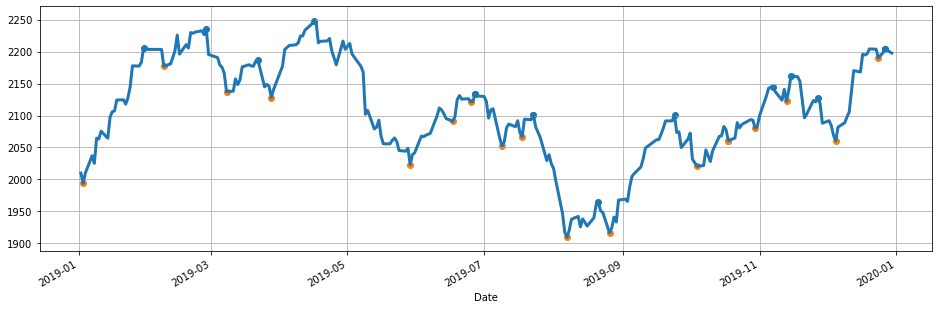

In [188]:
df['Close'].plot()
plt.scatter(maxima.index, df.loc[maxima.index,'Close'])
plt.scatter(minima.index, df.loc[minima.index,'Close'])

In [9]:
from scipy.signal import argrelextrema
import numpy as np
x = np.array([2, 1, 2, 3, 2, 0, 1, 0])
argrelextrema(x, np.greater)

(array([3, 6], dtype=int64),)